This notebook explores how memory—or storage capacity—relates to sales price. In summary:
- Laptops with higher capacity sell for more.
- Including memory capacity in the title generally raises selling price, and the effect is especially great when the laptop has high capacity.
- The same relationship holds between listing description and memory, though it's more subtle.

In [38]:
import pandas as pd

laptopData = pd.read_csv("fulldataset.csv", encoding = 'ISO-8859-1')

#since we're visualizing data in connection with memory, drop missing values for memory
laptopData = laptopData.dropna(subset=['memory'])
laptopData['memory'] = laptopData['memory'].astype(int)
laptopData.head()

,itemId,description,year,size,memory,containsDescription,title,condition,price,watchCount,...,used_in_description,used_in_title,year_in_description,year_in_title,size_in_description,size_in_title,memory_in_description,memory_in_title,n_words_in_description,n_words_in_title
0,NaN,NaN,2011.0,17.0,16,0,"Used Apple MacBook Pro 17 Inch, 2.2GHz quad-co...",NaN,700.0,NaN,...,False,True,False,False,False,True,False,True,0,12
1,NaN,Used Space Gray Macbook pro 15' (2017) with To...,2017.0,15.0,16,1,Used Space Gray Macbook pro 15' (2017) with To...,NaN,1000.0,NaN,...,True,True,True,True,True,True,False,False,19,9
2,NaN,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,2011.0,17.0,80,1,Macbook Pro A1297 Mid 2011 17' 2.3 GHz 8GB RAM...,NaN,310.0,NaN,...,True,True,True,True,True,True,False,False,354,15
3,2.940000e+11,I have a beautiful MacBook Pro for sale. It ha...,2009.0,15.0,120,1,Apple MacBook Pro OSX 2016 2.53GHz 4GB 120GB S...,Seller refurbished,300.0,7.0,...,True,False,False,False,True,True,True,True,286,13
4,2.750000e+11,MacBook Pro 13inch (Early 2011) in great condi...,2011.0,13.0,120,1,MacBook Pro 13-inch Early 2011 120GB SSD/10GB RAM,Used,249.0,2.0,...,False,False,True,True,True,True,True,True,906,7


As we might expect, the greater the storage capacity, the higher the final selling price:

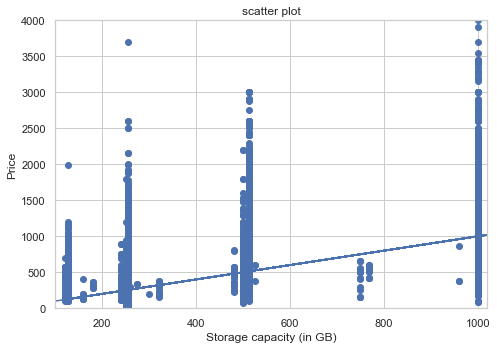

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, b = np.polyfit(laptopData["memory"], laptopData["memory"], 1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(laptopData["memory"], laptopData["price"], color='b')
ax.set_xlabel('Storage capacity (in GB)')
ax.set_ylabel('Price')
ax.set_title('scatter plot')
plt.plot(laptopData["memory"], m*laptopData["memory"] + b)
plt.xlim(100, 1020)
plt.ylim(0, 4000)
plt.show()

Generally we find that including capacity measurement in the title raises sales price, across the major capacity categories.
- And notice that the effect *doubles* as we move from 256 GB to 512 GB!
- Caveat: no comparison data for 1000 GB, since seller always included memory in the title in this case.

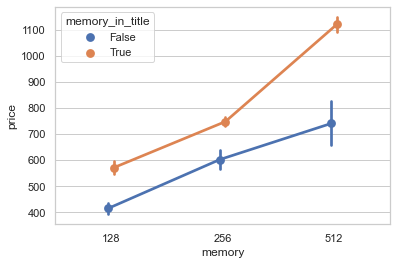

In [36]:
laptopData2 = laptopData[(laptopData['memory'] == 128) | (laptopData['memory'] == 256) | (laptopData['memory'] == 512)]

ax = sns.pointplot(x="memory", y="price", hue="memory_in_title", dodge=True, data=laptopData2)

There's a similar effect on *descriptions*, but it's more subtle. 
- Nearly no effect when the laptop is 128/256 GB;
- but a significant effect when it's 512GB.

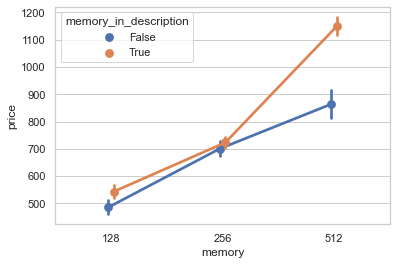

In [37]:
laptopData2 = laptopData[(laptopData['memory'] == 128) | (laptopData['memory'] == 256) | (laptopData['memory'] == 512)]

ax = sns.pointplot(x="memory", y="price", hue="memory_in_description", dodge=True, data=laptopData2)